# Notebook Config

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Variables

In [3]:
bs = 16
size = (480,640)

In [45]:
path = "../../Dataset/classifier-data/"
save_path = "saved-models/"

## Custom Functions

In [67]:
import shutil, os
def learn_save_copy(learn, name, export):
    if export:
        learn.export()
        path = "../../Dataset/classifier-data/" + "export.pkl"
    else:
        path = learn.save(name, return_path=True)
    print("Copying from: " + str(path) + "\nCopying to: " + save_path)
    shutil.copy(path, save_path)
    os.remove(path)

# Data Ingestion

In [5]:
np.random.seed(42)

In [6]:
#tfms = get_transforms(do_flip=False)

In [7]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(size=size)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

/home/hhhgohn/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
audience_presenter_slide
  if getattr(ds, 'warn', False): warn(ds.warn)


In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

['audience_presenter',
 'presenter',
 'presenter_slide',
 'presenter_whiteboard',
 'slide']

In [8]:
#data.show_batch(6)

# Training

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.790777,0.221394,0.070707,00:23
1,0.346329,0.065724,0.020202,00:19
2,0.190453,0.069875,0.020202,00:19
3,0.114378,0.059617,0.020202,00:20


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

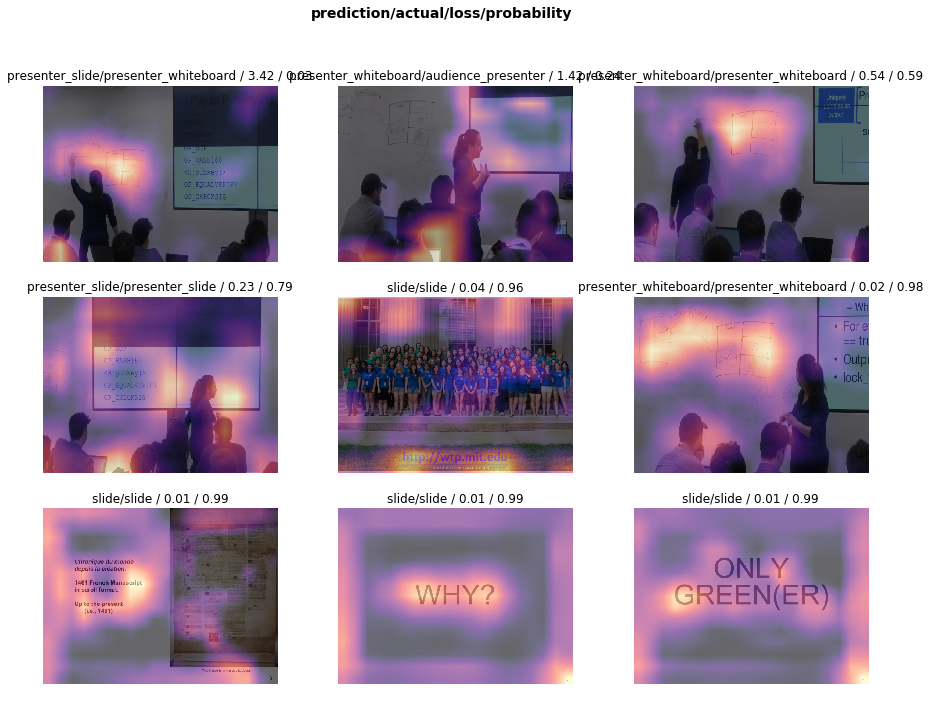

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

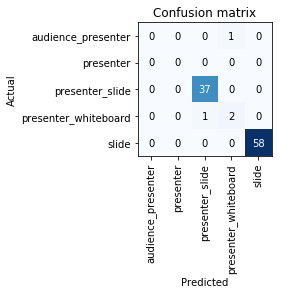

In [16]:
interp.plot_confusion_matrix()

In [18]:
interp.most_confused() #min_val=2

[('audience_presenter', 'presenter_whiteboard', 1),
 ('presenter_whiteboard', 'presenter_slide', 1)]

In [68]:
learn_save_copy(learn, "start", True)

Copying from: ../../Dataset/classifier-data/export.pkl
Copying to: saved-models/
